In [1]:
import os, sys
# Print current working directory
print "Current working dir : %s" % os.getcwd()

Current working dir : /Users/yizhisun/Desktop/capitol_one_2016


In [2]:
import pandas as pd
import numpy as np
from __future__ import division
import graphlab
import math
import string
from sklearn import preprocessing
from operator import itemgetter

In [3]:
# Read Original Data
data = pd.read_csv('output_new.csv')

In [4]:
# construct data impute function
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

data_tmp = [
    ['a', 1, 2],
    ['b', 1, 1],
    ['b', 2, 2],
    [np.nan, np.nan, np.nan]
]

X = pd.DataFrame(data_tmp)
xt = DataFrameImputer().fit_transform(X)

print('before...')
print(X)
print('after...')
print(xt)


before...
     0   1   2
0    a   1   2
1    b   1   1
2    b   2   2
3  NaN NaN NaN
after...
   0         1         2
0  a  1.000000  2.000000
1  b  1.000000  1.000000
2  b  2.000000  2.000000
3  b  1.333333  1.666667


In [5]:
# We impute our data
data_imputed = DataFrameImputer().fit_transform(data)

In [6]:
# delete ' ARQC_RSLT_CD'
del data_imputed[' ARQC_RSLT_CD']
# delete ' PIN_BLK_CD'
del data_imputed[' PIN_BLK_CD']
# delete ' SENDR_RSIDNL_CNTRY_CD'
del data_imputed[' SENDR_RSIDNL_CNTRY_CD']
# delete ' SRC_CRCY_DCML_PSN_NUM'
del data_imputed[' SRC_CRCY_DCML_PSN_NUM']

In [7]:
# show the information of imputed data
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210122 entries, 0 to 210121
Data columns (total 79 columns):
AUTH_ID                         210122 non-null int64
 ACCT_ID_TOKEN                  210122 non-null int64
 FRD_IND                        210122 non-null object
 ACCT_ACTVN_DT_YEAR             210122 non-null float64
 ACCT_ACTVN_DT_MONTH            210122 non-null float64
 ACCT_ACTVN_DT_DAY              210122 non-null float64
 ACCT_AVL_CASH_BEFORE_AMT       210122 non-null float64
 ACCT_AVL_MONEY_BEFORE_AMT      210122 non-null float64
 ACCT_CL_AMT                    210122 non-null float64
 ACCT_CURR_BAL                  210122 non-null float64
 ACCT_MULTICARD_IND             210122 non-null object
 ACCT_OPEN_DT_YEAR              210122 non-null int64
 ACCT_OPEN_DT_MONTH             210122 non-null int64
 ACCT_OPEN_DT_DAY               210122 non-null int64
 ACCT_PROD_CD                   210122 non-null object
 ACCT_TYPE_CD                   210122 non-null object
 ADR_VF

In [8]:
# Encode all features
le = preprocessing.LabelEncoder()
# get feature list
features = list(data_imputed.columns.values)
#object_features = []
for feature in features:
    if data_imputed[feature].dtype == 'O':
        #object_features.append(feature)
        data_imputed[feature] = le.fit_transform(data_imputed[feature])

In [9]:
features.remove(' FRD_IND')

In [10]:
# show the names of all features
features

['AUTH_ID',
 ' ACCT_ID_TOKEN',
 ' ACCT_ACTVN_DT_YEAR',
 ' ACCT_ACTVN_DT_MONTH',
 ' ACCT_ACTVN_DT_DAY',
 ' ACCT_AVL_CASH_BEFORE_AMT',
 ' ACCT_AVL_MONEY_BEFORE_AMT',
 ' ACCT_CL_AMT',
 ' ACCT_CURR_BAL',
 ' ACCT_MULTICARD_IND',
 ' ACCT_OPEN_DT_YEAR',
 ' ACCT_OPEN_DT_MONTH',
 ' ACCT_OPEN_DT_DAY',
 ' ACCT_PROD_CD',
 ' ACCT_TYPE_CD',
 ' ADR_VFCN_FRMT_CD',
 ' ADR_VFCN_RESPNS_CD',
 ' APPRD_AUTHZN_CNT',
 ' APPRD_CASH_AUTHZN_CNT',
 ' AUTHZN_ACCT_STAT_CD',
 ' AUTHZN_AMT',
 ' AUTHZN_CATG_CD',
 ' AUTHZN_CHAR_CD',
 ' AUTHZN_OPSET_ID',
 ' AUTHZN_ORIG_SRC_ID',
 ' AUTHZN_OUTSTD_AMT',
 ' AUTHZN_OUTSTD_CASH_AMT',
 ' AUTHZN_RQST_PROC_CD',
 ' AUTHZN_RQST_PROC_DT_YEAR',
 ' AUTHZN_RQST_PROC_DT_MONTH',
 ' AUTHZN_RQST_PROC_DT_DAY',
 ' AUTHZN_RQST_PROC_TM',
 ' AUTHZN_RQST_TYPE_CD',
 ' AUTHZN_TRMNL_PIN_CAPBLT_NUM',
 ' AVG_DLY_AUTHZN_AMT',
 ' CARD_VFCN_2_RESPNS_CD',
 ' CARD_VFCN_2_VLDTN_DUR',
 ' CARD_VFCN_MSMT_REAS_CD',
 ' CARD_VFCN_PRESNC_CD',
 ' CARD_VFCN_RESPNS_CD',
 ' CARD_VFCN2_VLDTN_CD',
 ' CDHLDR_PRES_CD',


In [12]:
# double check that Y, N have been converted to 0 & 1
print data[' FRD_IND'][:5]
print data_imputed[' FRD_IND'][:5]

0    Y
1    Y
2    Y
3    Y
4    Y
Name:  FRD_IND, dtype: object
0    1
1    1
2    1
3    1
4    1
Name:  FRD_IND, dtype: int64


In [13]:
# Now our data is ready to train
# transfer our dataset to SFrame
data_imputed_sf = graphlab.SFrame(data=data_imputed)

2016-04-01 11:24:32,858 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1459524271.log


This non-commercial license of GraphLab Create is assigned to sunyizhi@vt.edu and will expire on October 12, 2016. For commercial licensing options, visit https://dato.com/buy/.


In [14]:
# take a look of our dataset
data_imputed_sf

AUTH_ID,ACCT_ID_TOKEN,FRD_IND,ACCT_ACTVN_DT_YEAR,ACCT_ACTVN_DT_MONTH,ACCT_ACTVN_DT_DAY,ACCT_AVL_CASH_BEFORE_AMT
58,23296214,1,2006.0,8.0,25.0,2500.0
628,64354799,1,2013.0,2.0,23.0,500.0
1225,64354799,1,2013.0,2.0,23.0,500.0
3193,64354799,1,2013.0,2.0,23.0,500.0
3194,64354799,1,2013.0,2.0,23.0,500.0
3195,43220543,1,2012.0,9.0,23.0,250.0
4335,43220543,1,2012.0,9.0,23.0,250.0
4336,43220543,1,2012.0,9.0,23.0,250.0
4539,45163653,1,2010.29398745,6.54043014208,15.721848709,1500.0
5441,43220543,1,2012.0,9.0,23.0,250.0


In [54]:
# Make a train-valid-test split by 0.6, 0.2, 0.2
train_data, valid_data = data_imputed_sf.random_split(0.8)

In [55]:
model = graphlab.boosted_trees_classifier.create(train_data, target=' FRD_IND',
                                                 features = features,
                                                 max_iterations=500,
                                                 max_depth = 5,
                                                 step_size = 0.1,
                                                 row_subsample = 0.5,      
                                                 column_subsample = 0.5)


WARNING: Detected extremely low variance for feature(s) ' ACCT_MULTICARD_IND', ' AUTHZN_RQST_PROC_DT_YEAR', ' RVRSL_IND' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 160112

Number of classes           : 2

Number of feature columns   : 78

Number of unpacked features : 78

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.133191     | 0.702671          | 0.672832          | 0.701721            | 0.673134            |

| 2         | 0.286569     | 0.709047          | 0.658806          | 0.707616            | 0.659200            |

| 3         | 0.437741     | 0.742274          | 0.634956          | 0.742269            | 0.635579            |

| 4         | 0.577330     | 0.750269          | 0.616229          | 0.751293            | 0.617191            |

| 5         | 0.715472     | 0.751867          | 0.600537          | 0.752617            | 0.601944            |

| 6         | 0.855404     | 0.757645          | 0.585274          | 0.757671            | 0.586970            |

| 10        | 1.374410     | 0.769524          | 0.548798          | 0.766695            | 0.551050            |

| 11        | 1.506896     | 0.772597          | 0.542310          | 0.769703            | 0.544611            |

| 20        | 2.717376     | 0.779579          | 0.496401          | 0.777524            | 0.499640            |

| 30        | 4.057860     | 0.784395          | 0.472837          | 0.781133            | 0.476256            |

| 40        | 5.433259     | 0.789941          | 0.457399          | 0.789556            | 0.461363            |

| 50        | 6.777141     | 0.795025          | 0.444527          | 0.793045            | 0.449551            |

| 51        | 6.916765     | 0.795531          | 0.443504          | 0.794128            | 0.448455            |

| 60        | 8.106315     | 0.799028          | 0.436264          | 0.797497            | 0.441512            |

| 70        | 9.436582     | 0.803032          | 0.428523          | 0.800746            | 0.434214            |

| 80        | 10.782537    | 0.806592          | 0.421995          | 0.803393            | 0.427988            |

| 90        | 12.082646    | 0.809746          | 0.416471          | 0.804717            | 0.422773            |

| 100       | 13.442909    | 0.813093          | 0.410569          | 0.807845            | 0.417597            |

| 101       | 13.592682    | 0.813287          | 0.409979          | 0.808206            | 0.417050            |

| 110       | 14.870008    | 0.815111          | 0.406634          | 0.810131            | 0.414164            |

| 120       | 16.215830    | 0.818302          | 0.401900          | 0.813500            | 0.410139            |

| 130       | 17.565805    | 0.821319          | 0.397166          | 0.816268            | 0.406176            |

| 140       | 18.941316    | 0.824242          | 0.393010          | 0.817952            | 0.402894            |

| 150       | 20.457330    | 0.826565          | 0.388789          | 0.819998            | 0.399290            |

| 160       | 21.799378    | 0.828420          | 0.384879          | 0.821562            | 0.396073            |

| 170       | 23.246698    | 0.830506          | 0.381569          | 0.823607            | 0.393828            |

| 180       | 24.701008    | 0.832417          | 0.378515          | 0.824570            | 0.391269            |

| 190       | 26.087341    | 0.834747          | 0.374834          | 0.827097            | 0.388394            |

| 200       | 27.453974    | 0.836127          | 0.371966          | 0.826976            | 0.386254            |

| 210       | 29.011070    | 0.838020          | 0.368973          | 0.827217            | 0.383950            |

| 220       | 30.452843    | 0.839912          | 0.365902          | 0.828661            | 0.381726            |

| 230       | 31.835019    | 0.841517          | 0.363374          | 0.829383            | 0.379797            |

| 240       | 33.214073    | 0.843141          | 0.360438          | 0.831188            | 0.377830            |

| 250       | 34.578979    | 0.845333          | 0.357287          | 0.831188            | 0.375552            |

| 260       | 35.988709    | 0.846789          | 0.354961          | 0.831669            | 0.373747            |

| 270       | 37.395451    | 0.848038          | 0.352731          | 0.832271            | 0.372406            |

| 280       | 38.816559    | 0.849930          | 0.350091          | 0.833233            | 0.370609            |

| 290       | 40.217678    | 0.851192          | 0.347754          | 0.835279            | 0.368369            |

| 300       | 41.679970    | 0.852678          | 0.345244          | 0.836241            | 0.366776            |

| 310       | 43.092707    | 0.854152          | 0.343001          | 0.836602            | 0.365063            |

| 320       | 44.474267    | 0.855601          | 0.340687          | 0.838407            | 0.363459            |

| 330       | 45.876373    | 0.856913          | 0.338754          | 0.838166            | 0.362191            |

| 340       | 47.205674    | 0.858293          | 0.336665          | 0.839610            | 0.360864            |

| 350       | 48.719003    | 0.859592          | 0.334378          | 0.841174            | 0.359440            |

| 360       | 50.118943    | 0.860329          | 0.332662          | 0.841054            | 0.358706            |

| 370       | 51.482610    | 0.861828          | 0.330714          | 0.842859            | 0.357468            |

| 380       | 52.908590    | 0.863152          | 0.329163          | 0.843340            | 0.356532            |

| 390       | 54.298176    | 0.864045          | 0.327496          | 0.843581            | 0.355463            |

| 400       | 55.698231    | 0.865063          | 0.325789          | 0.844543            | 0.354189            |

| 410       | 57.084161    | 0.866025          | 0.323872          | 0.845867            | 0.352801            |

| 420       | 58.462985    | 0.867355          | 0.321817          | 0.847070            | 0.351496            |

| 430       | 59.893109    | 0.868380          | 0.319893          | 0.848514            | 0.350311            |

| 440       | 61.349450    | 0.869104          | 0.318391          | 0.849356            | 0.349253            |

| 450       | 62.699750    | 0.869866          | 0.316987          | 0.850319            | 0.348074            |

| 460       | 64.086967    | 0.870691          | 0.315398          | 0.850319            | 0.347087            |

| 470       | 65.479495    | 0.871777          | 0.313702          | 0.850800            | 0.346060            |

| 480       | 66.888478    | 0.872839          | 0.311773          | 0.850439            | 0.344800            |

| 490       | 68.327897    | 0.874013          | 0.310190          | 0.851642            | 0.343448            |

| 500       | 69.797887    | 0.874963          | 0.308534          | 0.852725            | 0.342877            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [56]:
# Save predictions to an SFrame (class and corresponding class-probabilities)


# Evaluate the model and save the results into a dictionary
results = model.evaluate(valid_data)

In [57]:
results

{'accuracy': 0.8544809228039042,
 'auc': 0.9326016140646327,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  3237 |
 |      1       |        1        | 17763 |
 |      0       |        1        |  2831 |
 |      0       |        0        | 17868 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8541135740731837,
 'log_loss': 0.3388430475361453,
 'precision': 0.8625327765368555,
 'recall': 0.8458571428571429,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+-------+
 | threshold | fpr | tpr |   p   |   n   |
 +-----------+-----+-----+-------+-------+
 |    0.0    | 1.0 | 1.0 | 21000 | 20699 |
 |   1e-05   | 1.0 | 1.0 | 21000 | 20699 |
 |   2e-0

In [70]:
predictions = model.predict(valid_data)
print predictions[13]

predictions_prob = model.predict(valid_data, output_type='probability')
print predictions_prob[13]

0
0.461153835058


In [59]:
# Plot ROC curve
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [60]:
fpr,  tpr = results['roc_curve']['fpr'], results['roc_curve']['tpr']

In [61]:
fpr

dtype: float
Rows: 100001
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999516884873665, 0.9999033769747331, 0.9999033769747331, 0.9998550654620996, 0.9998550654620996, 0.9998067539494662, 0.9998067539494662, 0.9998067539494662, 0.9998067539494662, 0.9997584424368327, 0.9997101309241992, 0.9997101309241992, 0.9997101309241992, 0.9996618194115657, 0.9995651963862988, 0.9995168848736654, 0.9995168848736654, 0.9995168848736654, 0.9995168848736654, 0.9995168848736654, 0.9995168848736654, 0.9995168848736654, 0.9995168848736654, 0.9994685733610319, 0.9994685733610319, 0.9994202618483985, 0.9994202618483985, 0.9994202618483985, 0.9994202618483985, 0.9993236388231316, 0.9992753273104981, 0.9992270157978647, 0.9991787042852311, 0.9991787042852311, 0.9991303927725977, 0.9990337697473308, 0.9990337697473308, 0.9989371467220639, 0.998840523696797, 0.998840523696797, 0.9987922121841635, 0.998

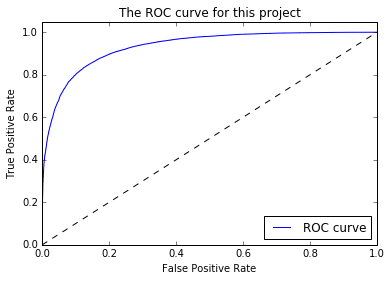

In [62]:
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve for this project')
plt.legend(loc="lower right")

In [96]:
# We need to use loss function to set the cutoff point
def lossFunction(creditLine, transactionAmount, pi, actualOutput):
    cutOffs = np.linspace(0.14, 0.2, num=20)

    losses = np.zeros(20)
    i = 0
    for cutOff in cutOffs:
        print(cutOff)
        j = 0
        for crdLine in creditLine:

            if pi[j] >= cutOff:
                if actualOutput[j] == 0:
                    if crdLine < 2000:
                        losses[i] += 0.02 * 75 + transactionAmount[j] * 0.0075
                    else:
                        losses[i] += 0.05 * 275 + 4 * transactionAmount[j] * 0.005
            else:
                if actualOutput[j] == 1:
                    losses[i] += transactionAmount[j]
            j += 1
        i += 1

    index = min(enumerate(losses), key=itemgetter(1))[0]
    loss = losses[index]
    indices = [i for i, x in enumerate(losses) if abs(x - loss) < 0.001]

    return cutOffs[max(indices)], losses

In [97]:
creditLine_valid = valid_data[' ACCT_CL_AMT']
transactionAmount_valid = valid_data[' AUTHZN_AMT']
pi_valid = predictions_prob
actualOutput_valid = valid_data[' FRD_IND']

In [98]:
c_best, losses = lossFunction(creditLine_valid, transactionAmount_valid, pi_valid, actualOutput_valid)

0.14
0.143157894737
0.146315789474
0.149473684211
0.152631578947
0.155789473684
0.158947368421
0.162105263158
0.165263157895
0.168421052632
0.171578947368
0.174736842105
0.177894736842
0.181052631579
0.184210526316
0.187368421053
0.190526315789
0.193684210526
0.196842105263
0.2


In [99]:
print c_best
print losses

0.184210526316
[ 93045.389925  92651.3387    91793.833575  91623.3224    90929.3706
  90397.95465   89989.04435   89445.66325   88608.35315   87968.04145
  87319.379375  86894.160475  87466.198525  87082.5928    86447.81405
  86643.557225  88379.58395   89146.280675  88733.8017    89091.33585 ]


In [108]:
model.show()

Canvas is accessible via web browser at the URL: http://localhost:54472/index.html
Opening Canvas in default web browser.


# So the cutoff point is 0.184

# Starts from here for the test dataset

In [102]:
data_test = pd.read_csv('output_validation_transformed.csv')

In [103]:
data_test_imputed = DataFrameImputer().fit_transform(data_test)

In [104]:
# delete ' ARQC_RSLT_CD'
del data_test_imputed[' ARQC_RSLT_CD']
# delete ' PIN_BLK_CD'
del data_test_imputed[' PIN_BLK_CD']
# delete ' SENDR_RSIDNL_CNTRY_CD'
del data_test_imputed[' SENDR_RSIDNL_CNTRY_CD']
# delete ' SRC_CRCY_DCML_PSN_NUM'
del data_test_imputed[' SRC_CRCY_DCML_PSN_NUM']

In [105]:
data_test_imputed[' FRD_IND']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
            ..
11302879   NaN
11302880   NaN
11302881   NaN
11302882   NaN
11302883   NaN
11302884   NaN
11302885   NaN
11302886   NaN
11302887   NaN
11302888   NaN
11302889   NaN
11302890   NaN
11302891   NaN
11302892   NaN
11302893   NaN
11302894   NaN
11302895   NaN
11302896   NaN
11302897   NaN
11302898   NaN
11302899   NaN
11302900   NaN
11302901   NaN
11302902   NaN
11302903   NaN
11302904   NaN
11302905   NaN
11302906   NaN
11302907   NaN
11302908   NaN
Name:  FRD_IND, dtype: float64

In [106]:
# get feature list
features_test = list(data_test_imputed.columns.values)
#object_features = []
for feature in features_test:
    if data_test_imputed[feature].dtype == 'O' and feature != ' FRD_IND':
        #object_features.append(feature)
        data_test_imputed[feature] = le.fit_transform(data_test_imputed[feature])

In [107]:
data_test_imputed_sf = graphlab.SFrame(data=data_test_imputed)

In [111]:
prob_final = model.predict(data_test_imputed_sf, output_type='probability')


External memory mode: 14 batches

In [112]:
prob_final

dtype: float
Rows: 11302909
[0.3152681291103363, 0.19388847053050995, 0.6806464195251465, 0.11644598096609116, 0.16059599816799164, 0.09803858399391174, 0.6078845262527466, 0.20614619553089142, 0.34071049094200134, 0.32168254256248474, 0.7438180446624756, 0.4270799160003662, 0.34498700499534607, 0.3710542917251587, 0.376710444688797, 0.204639732837677, 0.20302772521972656, 0.2593739926815033, 0.5523571372032166, 0.25298619270324707, 0.1967211365699768, 0.3723211884498596, 0.16743144392967224, 0.8085282444953918, 0.11393005400896072, 0.12881982326507568, 0.5624254941940308, 0.21444837749004364, 0.13643963634967804, 0.7966628670692444, 0.5304374694824219, 0.8622031211853027, 0.5534548759460449, 0.13603290915489197, 0.2071934938430786, 0.127534419298172, 0.27275535464286804, 0.9721055626869202, 0.8491470217704773, 0.0018190069822594523, 0.9133628010749817, 0.861046552658081, 0.26514843106269836, 0.11727587133646011, 0.16194574534893036, 0.18157586455345154, 0.11793597042560577, 0.59636676

In [118]:
c_best

0.18421052631578949

In [119]:
decline = prob_final > c_best

In [121]:
type(decline)

graphlab.data_structures.sarray.SArray

In [122]:
ID = data_test_imputed_sf['AUTH_ID']

In [124]:
submit_SF = graphlab.SFrame([ID, prob_final, decline])

In [129]:
submit_SF['X3'] = submit_SF['X3'].apply(lambda x: 'Y' if x == 1 else 'N')

In [130]:
submit_SF

X1,X2,X3
8,0.31526812911,Y
12,0.193888470531,Y
18,0.680646419525,Y
19,0.116445980966,N
37,0.160595998168,N
38,0.0980385839939,N
54,0.607884526253,Y
63,0.206146195531,Y
74,0.340710490942,Y
76,0.321682542562,Y


In [131]:
submit_SF.rename({'X1': 'AUTH_ID', 'X2':'P_FRAUD', 'X3':'DECLINE'})

AUTH_ID,P_FRAUD,DECLINE
8,0.31526812911,Y
12,0.193888470531,Y
18,0.680646419525,Y
19,0.116445980966,N
37,0.160595998168,N
38,0.0980385839939,N
54,0.607884526253,Y
63,0.206146195531,Y
74,0.340710490942,Y
76,0.321682542562,Y


In [132]:
submit_SF.save('/Users/yizhisun/Dropbox/C1_final_submit/final_submit.csv', format='csv')

# Plot of cutoff and Loss

In [134]:
cutOffs = np.linspace(0.14, 0.2, num=20)
print losses
print cutOffs

[ 93045.389925  92651.3387    91793.833575  91623.3224    90929.3706
  90397.95465   89989.04435   89445.66325   88608.35315   87968.04145
  87319.379375  86894.160475  87466.198525  87082.5928    86447.81405
  86643.557225  88379.58395   89146.280675  88733.8017    89091.33585 ]
[ 0.14        0.14315789  0.14631579  0.14947368  0.15263158  0.15578947
  0.15894737  0.16210526  0.16526316  0.16842105  0.17157895  0.17473684
  0.17789474  0.18105263  0.18421053  0.18736842  0.19052632  0.19368421
  0.19684211  0.2       ]


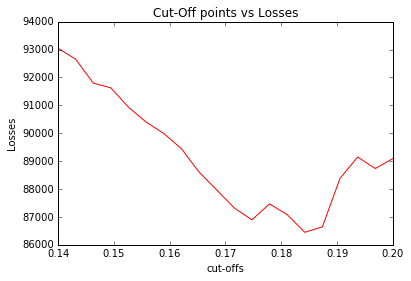

In [136]:
plt.plot(cutOffs, losses, 'r-')
plt.xlabel('cut-offs')
plt.ylabel('Losses')
plt.title('Cut-Off points vs Losses')